In [1]:
%cd ./..
import sys
from dataset import *
from trainer import Trainer
from ezdict import EZDict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import matplotlib
import pandas as pd
from sklearn.feature_selection import mutual_info_regression as MIR

/media/hdd10tb/yingxic4/SAILER


In [8]:
def get_cmap1(n, name='tab20b'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def get_cmap2(n, name='tab20c'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap1 = get_cmap1(20)
cmap2 = get_cmap2(20)

In [2]:
args = EZDict({
    "name": 'atlas_z50',#'invvae_nodice_c200_b400_s0.4f3000var', #'invvae_bce30_c60_s0.35f3000var', #"warmup_train_s0.8f5000bs10k"
    'log': 'train_log.csv',
    'load_ckpt': False, #'/home/yingxinc4/DeepATAC/models/newsub_bce25_s0.35f3000var/warmup.pt',
    'cuda_dev': [3], #False
    'sample_batch': False,
    "max_epoch": 400,
    'start_epoch': 1,
    'batch_size': 400,
    'start_save': 290,
    'LAMBDA': 1,
    'conv': False,
    'model_type': 'inv', #'dense', #'conv2', 
    'data_type': 'atlas', #'atlas', #'simATAC', #'benchmark',
    'lr': 1e-3, #dense 1e-3 conv 1e-2
    'pos_w': 30,
    'weight_decay': 5e-4,
    'optimizer': 'adam',
    'z_dim': 50,
    'out_every': 5,
    'ckpt_dir': './models/',
    #simATAC
    'setting': 2,
    'signal': 0.4,
    'frags': 3000,
    'bin_size': 10000,
    #ATACbenchmark
    'cov': 1000
})

In [3]:
solver = Trainer(args)

Using cuda
Finish loading in 22.265398740768433, data size (81173, 50562)


In [4]:
solver.warm_up()

  0%|          | 0/10 [00:00<?, ?it/s]

Making dir ./models/atlas_z50


100%|██████████| 10/10 [05:18<00:00, 31.83s/it]

[Warmup Finished]


In [5]:
solver.inv_train()

  0%|          | 0/399 [00:00<?, ?it/s]

Inv Training started


400it [3:32:06, 31.82s/it]                           

[Inv Training Finished]


In [6]:
latent, labels, depth = solver.encode_adv()

82it [01:06,  1.23it/s]


In [9]:
result = latent.numpy()

In [10]:
l = pd.DataFrame(labels, columns=['celltype'])

In [15]:
# reducer = umap.UMAP(random_state=123)
X_embedded = TSNE(n_components=2).fit_transform(result)

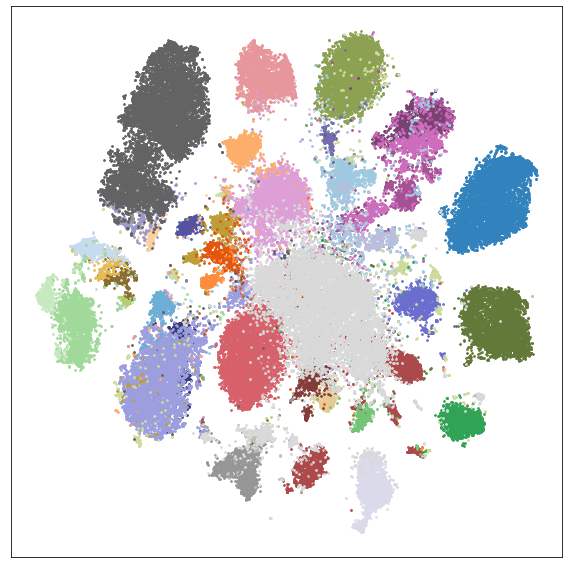

In [16]:
plt.figure(figsize=(8, 8))
for i, c in enumerate(np.unique(l)):
    mask = (l == c).values.flatten()
    if i < 20:
        plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=c, s=3, color=cmap1(i))
    else:
        plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=c, s=3, color=cmap2(i-20))
    plt.xticks([], [])
    plt.yticks([], [])
plt.tight_layout()
# plt.legend()

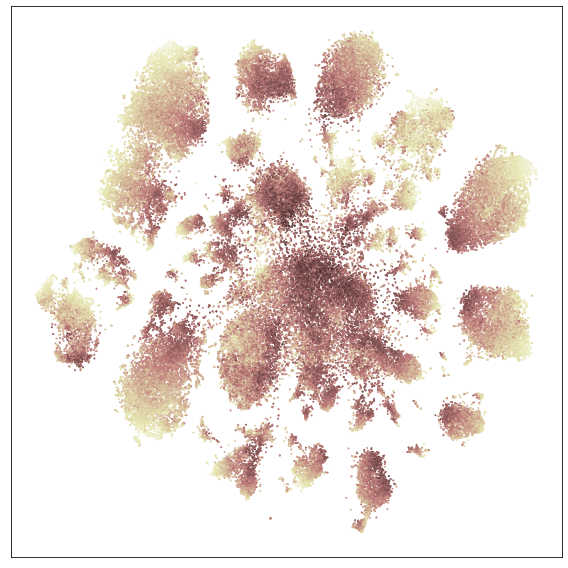

In [17]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(X_embedded[:, 0], 
            X_embedded[:, 1], 
            s=1, 
            c=np.array(depth),
            norm=matplotlib.colors.LogNorm(),
            cmap='pink'
            )
plt.xticks([], [])
plt.yticks([], [])
cbar = plt.colorbar()
cbar.remove()
plt.tight_layout()